# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import seaborn as sns

sinasc = pd.read_csv('/content/SINASC_RO_2019.csv')
sinasc[['APGAR5']]

,APGAR5
0,10.0
1,9.0
2,10.0
3,10.0
4,10.0
...,...
27023,9.0
27024,9.0
27025,10.0
27026,9.0


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

<Axes: xlabel='ASFIXIA', ylabel='count'>

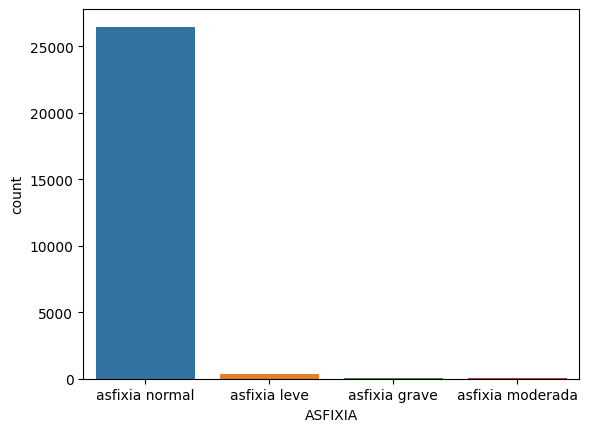

In [2]:
sinasc.loc[(sinasc['APGAR5'] >= 0 ) & (sinasc['APGAR5'] <= 3), 'ASFIXIA'] = 'asfixia grave'
sinasc.loc[(sinasc['APGAR5'] >= 4 ) & (sinasc['APGAR5'] <= 5), 'ASFIXIA'] = 'asfixia moderada'
sinasc.loc[(sinasc['APGAR5'] >= 6 ) & (sinasc['APGAR5'] <= 7), 'ASFIXIA'] = 'asfixia leve'
sinasc.loc[(sinasc['APGAR5'] >= 8 ) & (sinasc['APGAR5'] <= 10), 'ASFIXIA'] = 'asfixia normal'
sns.countplot(x='ASFIXIA', data=sinasc)

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [3]:
sinasc['GESTACAO'].fillna(method='ffill', inplace=True)
sinasc['GESTACAO'].isna().sum()

0

In [4]:
sinasc['GESTACAO'] = sinasc['GESTACAO'].apply(lambda value: value.replace('semanas', '').replace('e mais', '+').replace('a', '-').replace('Menos de', '-').replace(' ', ''))

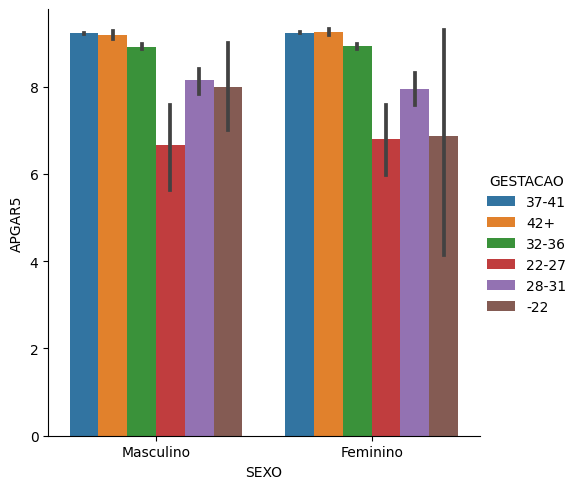

In [5]:
sns.catplot(x='SEXO', y='APGAR5', hue='GESTACAO', kind='bar', data=sinasc)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [7]:
cross = pd.crosstab(sinasc['APGAR5'], sinasc['GESTACAO'])
cross

GESTACAO,-22,22-27,28-31,32-36,37-41,42+
APGAR5,,,,,,
0.0,1,7,0,2,6,1
1.0,0,0,0,3,21,0
2.0,1,8,2,2,5,0
3.0,0,6,1,2,6,0
4.0,0,1,6,8,8,0
5.0,0,0,7,11,26,1
6.0,0,2,7,18,51,1
7.0,1,10,11,59,155,5
8.0,0,25,61,380,1480,48


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [8]:
percentual = cross.div(cross.sum(axis=1), axis=0)
percentual

GESTACAO,-22,22-27,28-31,32-36,37-41,42+
APGAR5,,,,,,
0.0,0.058824,0.411765,0.000000,0.117647,0.352941,0.058824
1.0,0.000000,0.000000,0.000000,0.125000,0.875000,0.000000
2.0,0.055556,0.444444,0.111111,0.111111,0.277778,0.000000
3.0,0.000000,0.400000,0.066667,0.133333,0.400000,0.000000
4.0,0.000000,0.043478,0.260870,0.347826,0.347826,0.000000
5.0,0.000000,0.000000,0.155556,0.244444,0.577778,0.022222
6.0,0.000000,0.025316,0.088608,0.227848,0.645570,0.012658
7.0,0.004149,0.041494,0.045643,0.244813,0.643154,0.020747
8.0,0.000000,0.012538,0.030592,0.190572,0.742227,0.024072


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='APGAR5'>

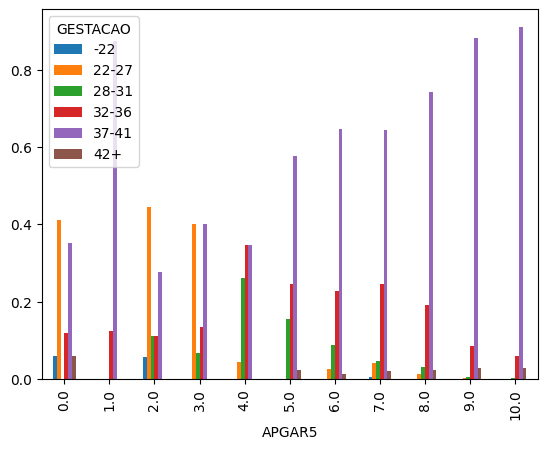

In [9]:
percentual.plot.bar()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

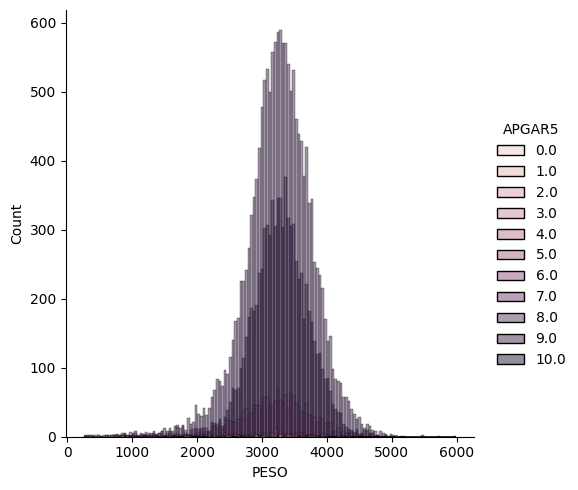

In [14]:
sns.displot(x='PESO', hue='APGAR5', data=sinasc)